In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [69]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [70]:
## data preprocessing

In [71]:
data.shape

(7920, 3)

In [72]:
data.duplicated().sum()

0

In [73]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [74]:
## text preprocessing

In [75]:
import re
import string

In [76]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

convert upercase into lowercase

In [77]:
data["tweet"] = data["tweet"].apply(lambda x : " ".join(x.lower() for x in x.split()))

In [78]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links 

In [79]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [80]:
data["tweet"].head(5)


0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove punctuation marks

In [81]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [82]:
def remove_punctuations(text):
       for punctuation in string.punctuation:
           text = text.replace(punctuation, '')
       return text
    
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [83]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

remove numbers 

In [84]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

In [85]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [86]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [87]:
import nltk

In [88]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [89]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
        sw = file.read().splitlines()

In [90]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [91]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [92]:
data["tweet"].head

<bound method NDFrame.head of 0       fingerprint pregnancy test android apps beauti...
1       finally transparant silicon case thanks uncle ...
2       love would go talk makememories unplug relax i...
3       im wired know im george made way iphone cute d...
4       amazing service apple wont even talk question ...
                              ...                        
7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely year old neighbor ipad morning ...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, Length: 7920, dtype: object>

steaming

In [93]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [94]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))
   

In [95]:
data["tweet"].head

<bound method NDFrame.head of 0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object>

In [96]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


## build vocabulary

In [97]:
from collections import Counter
vocab = Counter()

In [98]:
vocab

Counter()

In [99]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [100]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [101]:
len(vocab)

15949

In [102]:
data.shape

(7920, 3)

In [103]:
tokens = [key for key in vocab if vocab[key] > 10]

In [104]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [105]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## divide dataset 

In [106]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [107]:
X = data['tweet']
y = data['label']

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
X_train


7914    gain follow rt must follow follow back follow ...
110     iphon losin phone recept got text n miss call ...
5439    game nba final draw close… news photographi fa...
4810    gain follow rt must follow follow back follow ...
4580                u randomli start play iphon fuck appl
                              ...                        
2158    much effort avoid pay tax fair wage employeebe...
1024    fuckyou appl iphon cant handl bigassev within ...
911            appl shop visit need volum button go break
6185         win phone work fri th opposit soni xperia sp
1598    acess game play xbox charg charger soni pilha ...
Name: tweet, Length: 6336, dtype: object

In [110]:
data.shape

(7920, 3)

In [111]:
y_test

4251    0
4481    0
6990    1
4140    0
312     0
       ..
6377    0
6746    0
3393    0
3789    0
6674    1
Name: label, Length: 1584, dtype: int64

In [112]:
X_train

7914    gain follow rt must follow follow back follow ...
110     iphon losin phone recept got text n miss call ...
5439    game nba final draw close… news photographi fa...
4810    gain follow rt must follow follow back follow ...
4580                u randomli start play iphon fuck appl
                              ...                        
2158    much effort avoid pay tax fair wage employeebe...
1024    fuckyou appl iphon cant handl bigassev within ...
911            appl shop visit need volum button go break
6185         win phone work fri th opposit soni xperia sp
1598    acess game play xbox charg charger soni pilha ...
Name: tweet, Length: 6336, dtype: object

In [113]:
X_test

4251    given £ grant laptop sexi new laptop arriv tod...
4481    messi musician music fashion iphon men women h...
6990    need appl devic safari browser watch keynot th...
4140    «coqu day» pour iphon sur iphon coqueiphon coq...
312     use love instagram upgrad introduc power new f...
                              ...                        
6377    beauti sunset sunset crazysunset iphon instagr...
6746    halloween costum year samsung note spooki scar...
3393    glad manag catch ray sunshin yesterday today w...
3789    christma present famili got iphon ipadmini ear...
6674    oh yeah took much time get work use legal mac ...
Name: tweet, Length: 1584, dtype: object

In [114]:
y_train

7914    0
110     1
5439    0
4810    0
4580    1
       ..
2158    1
1024    1
911     0
6185    0
1598    0
Name: label, Length: 6336, dtype: int64

## vectorisation

In [115]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [116]:
vectorized_x_train = vectorizer(X_train, tokens)

In [117]:
vectorized_x_test = vectorizer(X_test, tokens)

In [118]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [119]:
y_train

7914    0
110     1
5439    0
4810    0
4580    1
       ..
2158    1
1024    1
911     0
6185    0
1598    0
Name: label, Length: 6336, dtype: int64

In [120]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [121]:
y_test

4251    0
4481    0
6990    1
4140    0
312     0
       ..
6377    0
6746    0
3393    0
3789    0
6674    1
Name: label, Length: 1584, dtype: int64

In [122]:
y_train.value_counts()

label
0    4712
1    1624
Name: count, dtype: int64

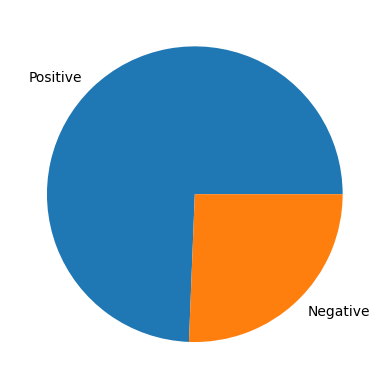

In [123]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

## Handle imbalaced dataset

In [124]:
pip install imbalanced-learn

In [125]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9424, 1145) (9424,)


In [126]:
y_train_smote.value_counts()

label
0    4712
1    4712
Name: count, dtype: int64

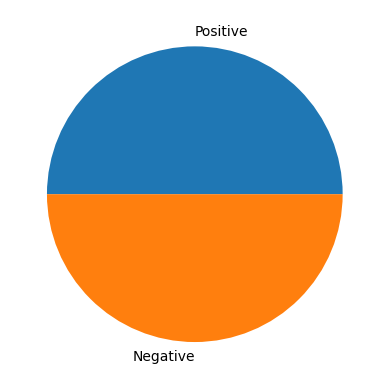

In [127]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [128]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [129]:
y_train_smote

0       0
1       1
2       0
3       0
4       1
       ..
9419    1
9420    1
9421    1
9422    1
9423    1
Name: label, Length: 9424, dtype: int64

In [130]:
y_test

4251    0
4481    0
6990    1
4140    0
312     0
       ..
6377    0
6746    0
3393    0
3789    0
6674    1
Name: label, Length: 1584, dtype: int64

In [131]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Model Training and Evaluation

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [133]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

LogisticRegression

In [134]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.94
	Precision = 0.915
	Recall = 0.97
	F1-Score = 0.942
Testing Scores:
	Accuracy = 0.853
	Precision = 0.671
	Recall = 0.823
	F1-Score = 0.74


naive bayes

In [135]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.94
	Precision = 0.915
	Recall = 0.97
	F1-Score = 0.942
Testing Scores:
	Accuracy = 0.853
	Precision = 0.671
	Recall = 0.823
	F1-Score = 0.74


Decision Tree

In [136]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.804
	Precision = 0.602
	Recall = 0.677
	F1-Score = 0.637


random forest 

In [137]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.854
	Precision = 0.715
	Recall = 0.706
	F1-Score = 0.711


support vector machine

In [138]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.962
	Recall = 0.996
	F1-Score = 0.979
Testing Scores:
	Accuracy = 0.86
	Precision = 0.702
	Recall = 0.779
	F1-Score = 0.738


In [139]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)